In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('daily-min-temperatures.csv', parse_dates = [0], index_col = 0).squeeze()
data.head(5)

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

In [12]:
data['1981-01']

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
1981-01-06    15.8
1981-01-07    15.8
1981-01-08    17.4
1981-01-09    21.8
1981-01-10    20.0
1981-01-11    16.2
1981-01-12    13.3
1981-01-13    16.7
1981-01-14    21.5
1981-01-15    25.0
1981-01-16    20.7
1981-01-17    20.6
1981-01-18    24.8
1981-01-19    17.7
1981-01-20    15.5
1981-01-21    18.2
1981-01-22    12.1
1981-01-23    14.4
1981-01-24    16.0
1981-01-25    16.5
1981-01-26    18.7
1981-01-27    19.4
1981-01-28    17.2
1981-01-29    15.5
1981-01-30    15.1
1981-01-31    15.4
Name: Temp, dtype: float64

In [13]:
data.describe()

count    3650.000000
mean       11.177753
std         4.071837
min         0.000000
25%         8.300000
50%        11.000000
75%        14.000000
max        26.300000
Name: Temp, dtype: float64

In [14]:
data.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 3650 entries, 1981-01-01 to 1990-12-31
Series name: Temp
Non-Null Count  Dtype  
--------------  -----  
3650 non-null   float64
dtypes: float64(1)
memory usage: 57.0 KB


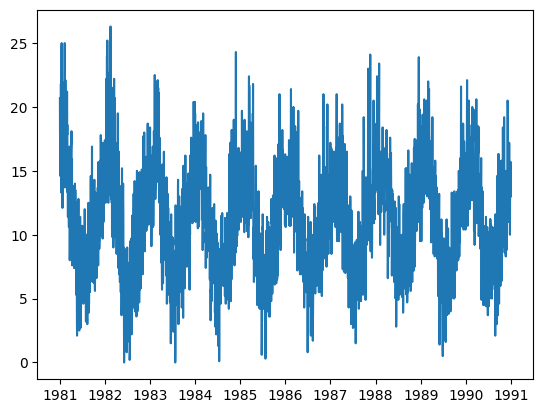

In [15]:
plt.plot(data)
plt.show()

<Axes: xlabel='Date'>

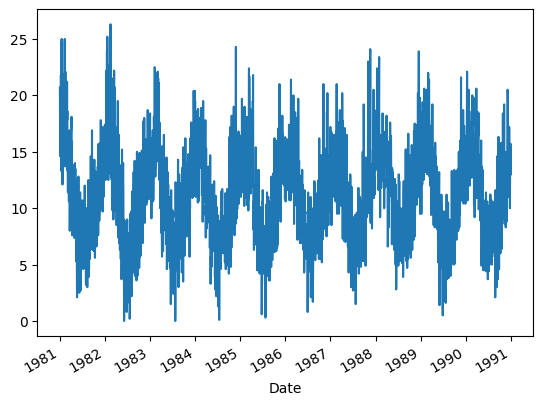

In [16]:
data.plot()

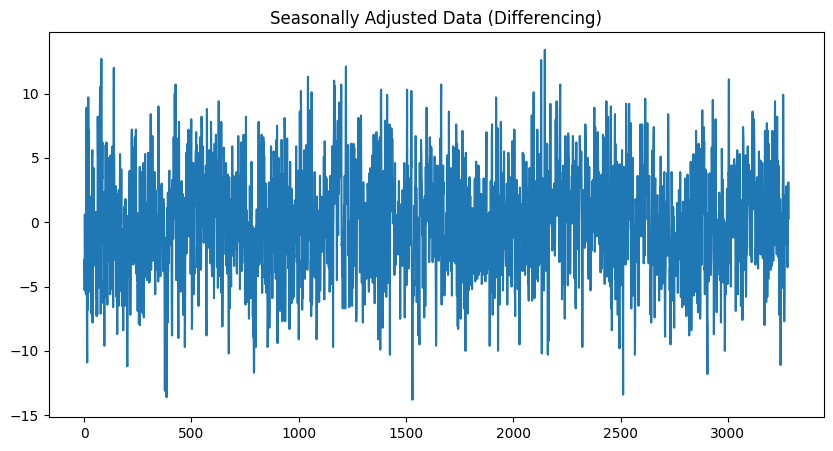

In [28]:
# Apply differencing for seasonal adjustment
days_in_year = 365
diff = data.values[days_in_year:] - data.values[:-days_in_year]

# Plot the seasonally adjusted data
plt.figure(figsize=(10,5))
plt.plot(diff)
plt.title('Seasonally Adjusted Data (Differencing)')
plt.show()


Monthly Mean Temperatures:
Date
1981-01-31    17.712903
1981-02-28    17.678571
1981-03-31    13.500000
1981-04-30    12.356667
1981-05-31     9.490323
1981-06-30     7.306667
1981-07-31     7.577419
1981-08-31     7.238710
1981-09-30    10.143333
1981-10-31    10.087097
1981-11-30    11.890000
1981-12-31    13.680645
1982-01-31    16.567742
Freq: M, Name: Temp, dtype: float64


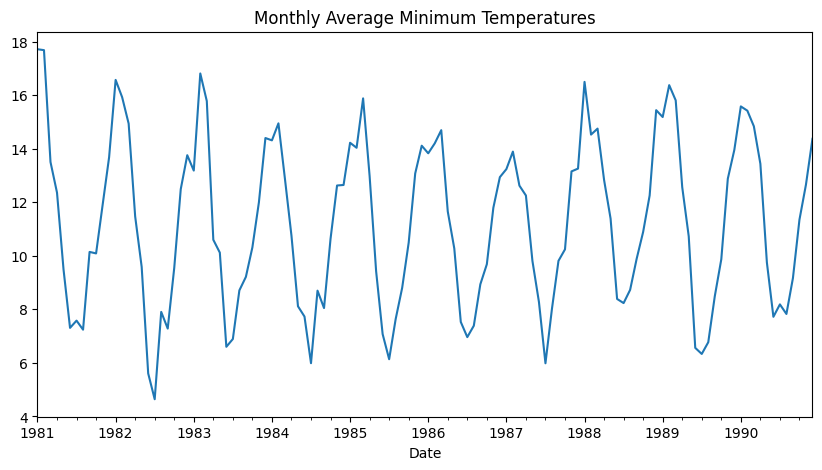

In [22]:
# Resample the data to monthly averages
monthly_mean = data.resample('M').mean()

# Display the first 13 months of data
print("Monthly Mean Temperatures:")
print(monthly_mean.head(13))

# Plot the monthly mean temperatures
plt.figure(figsize=(10,5))
monthly_mean.plot(title='Monthly Average Minimum Temperatures')
plt.show()

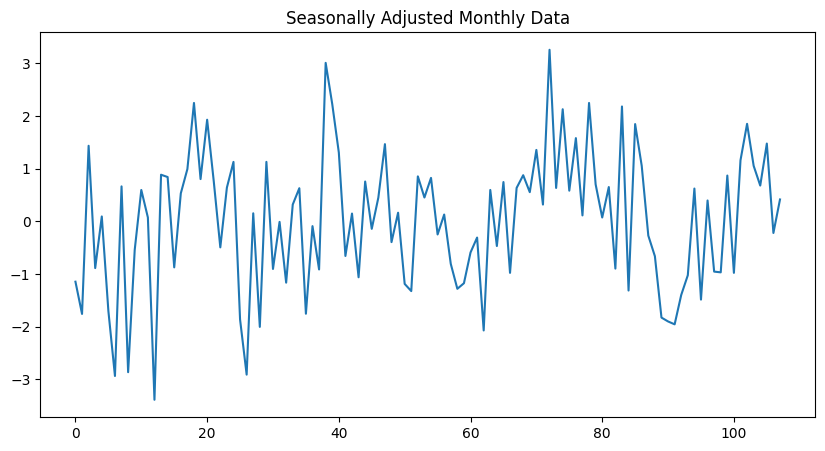

In [23]:
# Apply monthly differencing
months_in_year = 12
monthly_diff = monthly_mean.values[months_in_year:] - monthly_mean.values[:-months_in_year]

# Plot the seasonally adjusted monthly data
plt.figure(figsize=(10,5))
plt.plot(monthly_diff)
plt.title('Seasonally Adjusted Monthly Data')
plt.show()

Polynomial Coefficients:
[-1.17308000e-08  9.30253946e-06 -2.15977594e-03  1.19147966e-01
  1.38980178e+01]


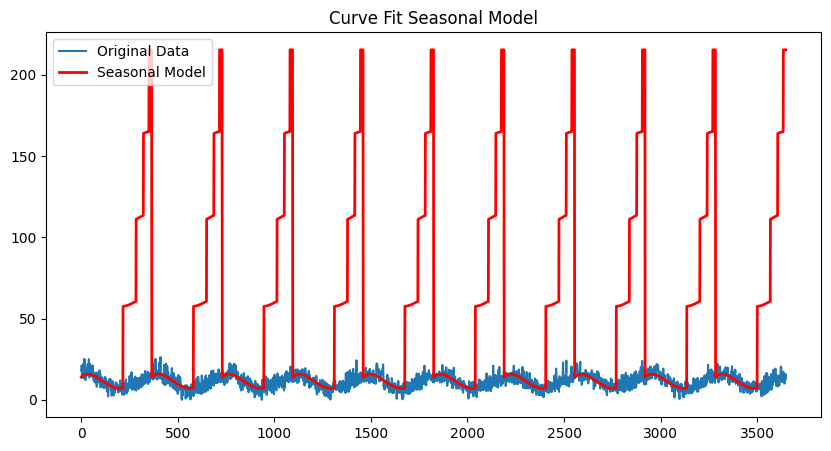

In [25]:
# Prepare data for curve fitting
days = np.arange(len(data)) % 365
degree = 4
coef = np.polyfit(days, data.values.flatten(), degree)
curve = sum(coef[i] * (days ** (degree - i)) for i in range(degree + 1))

# Display the polynomial coefficients
print("Polynomial Coefficients:")
print(coef)

# Plot the original data with the seasonal model
plt.figure(figsize=(10,5))
plt.plot(data.values, label='Original Data')
plt.plot(curve, color='red', linewidth=2, label='Seasonal Model')
plt.legend()
plt.title('Curve Fit Seasonal Model')
plt.show()

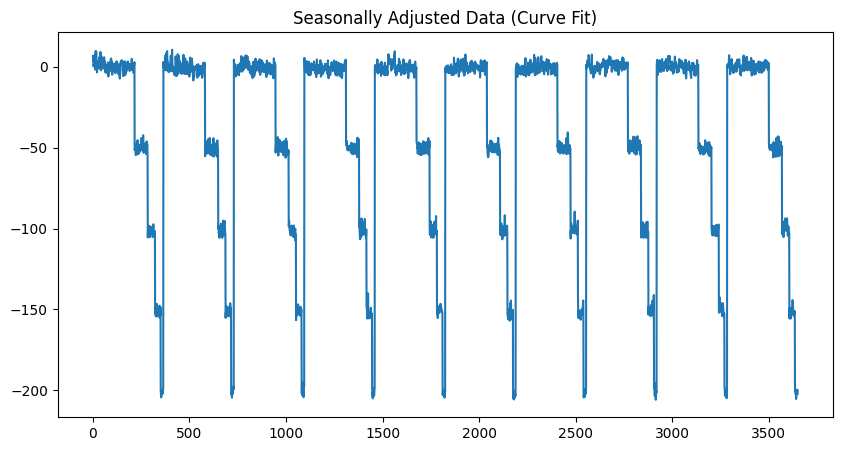

In [27]:
# Remove seasonality using the fitted curve
seasonally_adjusted = data.values.flatten() - curve

# Plot the seasonally adjusted dataset
plt.figure(figsize=(10,5))
plt.plot(seasonally_adjusted)
plt.title('Seasonally Adjusted Data (Curve Fit)')
plt.show()